In [109]:
library(ggplot2)
library(DAAG)
attach(ironslag)

The following objects are masked from ironslag (pos = 3):

    chemical, magnetic

The following objects are masked from ironslag (pos = 4):

    chemical, magnetic



### Problem 1

In [12]:
x = c(12, 17, 14, 9)
y = c(23, 18, 26, 21)
all = union(x, y)

In [5]:
mean_diff = abs(mean(x) - mean(y))

In [2]:
library(gtools)

In [40]:
perm = combinations(8, 4)
perm_diff = numeric(nrow(perm))

for (i in 1:nrow(perm)){
    perm_diff[i] = mean(all[perm[i,]]) - mean(all[-perm[i,]])
}

In [41]:
asl = mean(perm_diff >= mean_diff)

In [42]:
asl

[1] 0.01428571

### Problem 2

#### b) 

In [43]:
aov.chicks = aov(chickwts$weight~chickwts$feed)

In [44]:
aov.chicks

Call:
   aov(formula = chickwts$weight ~ chickwts$feed)

Terms:
                chickwts$feed Residuals
Sum of Squares       231129.2  195556.0
Deg. of Freedom             5        65

Residual standard error: 54.85029
Estimated effects may be unbalanced

In [66]:
summary(aov.chicks)[[1]][1, "F value"]

[1] 15.3648

### c)

In [55]:
n = 1000

In [62]:
repl = replicate(n, {
    sampled_feeds = sample(chickwts$feed)
    aov_res = aov(chickwts$weight ~ sampled_feeds)
    summary(aov_res)[[1]][1, "F value"]
    }
)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


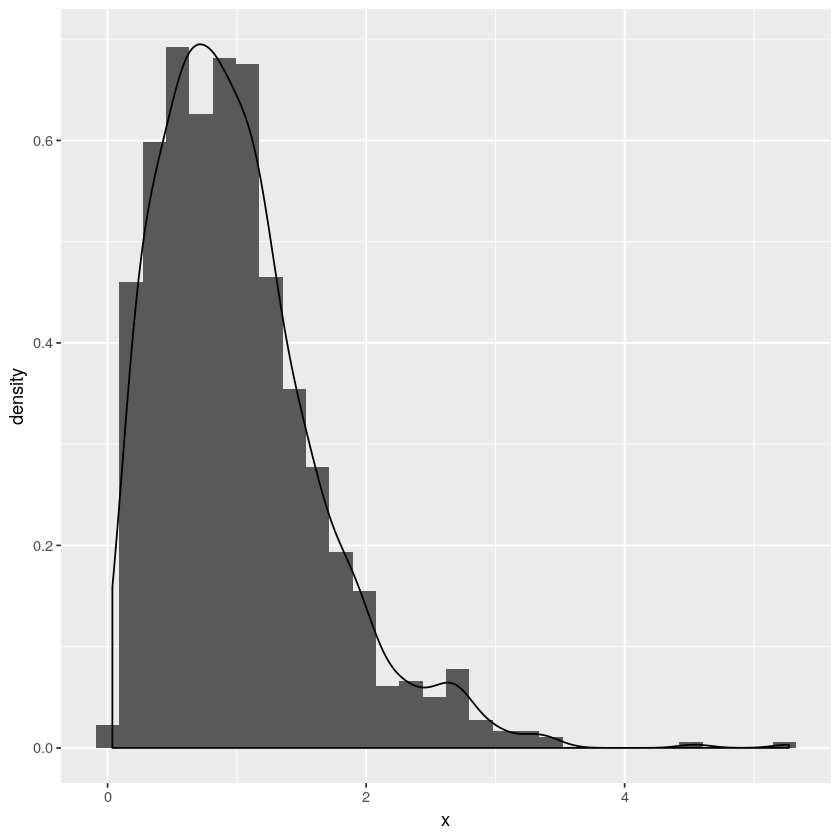

In [69]:
ggplot(data.frame(x = repl), aes(x, stat(density))) + 
       geom_histogram() + 
       geom_density()

### e)

In [70]:
weight.soybean = chickwts$weight[chickwts$feed == "soybean"]
weight.linseed = chickwts$weight[chickwts$feed == "linseed"]

In [71]:
ecdf.soybean = ecdf(weight.soybean)
ecdf.linseed = ecdf(weight.linseed)

In [75]:
weights = sort(unique(c(weight.soybean, weight.linseed)))

In [80]:
ecdf.diff = abs(ecdf.linseed(weights) - ecdf.soybean(weights))

In [82]:
max(ecdf.diff)

[1] 0.297619

In [86]:
ks.test(weight.soybean, weight.linseed)

Warning message in ks.test(weight.soybean, weight.linseed):
“cannot compute exact p-value with ties”


	Two-sample Kolmogorov-Smirnov test

data:  weight.soybean and weight.linseed
D = 0.29762, p-value = 0.6162
alternative hypothesis: two-sided


### f)

In [87]:
union_weight = union(weight.soybean, weight.linseed)
rep = replicate(n, {
    indexes = sample(1:length(union_weight), 14, replace = FALSE)
    soybean = union_weight[indexes]
    linseed = union_weight[-indexes]
    statistic = ks.test(soybean, linseed)$statistic
})

In [99]:
asl = mean(rep>=max(ecdf.diff))

In [100]:
asl

[1] 0.566

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


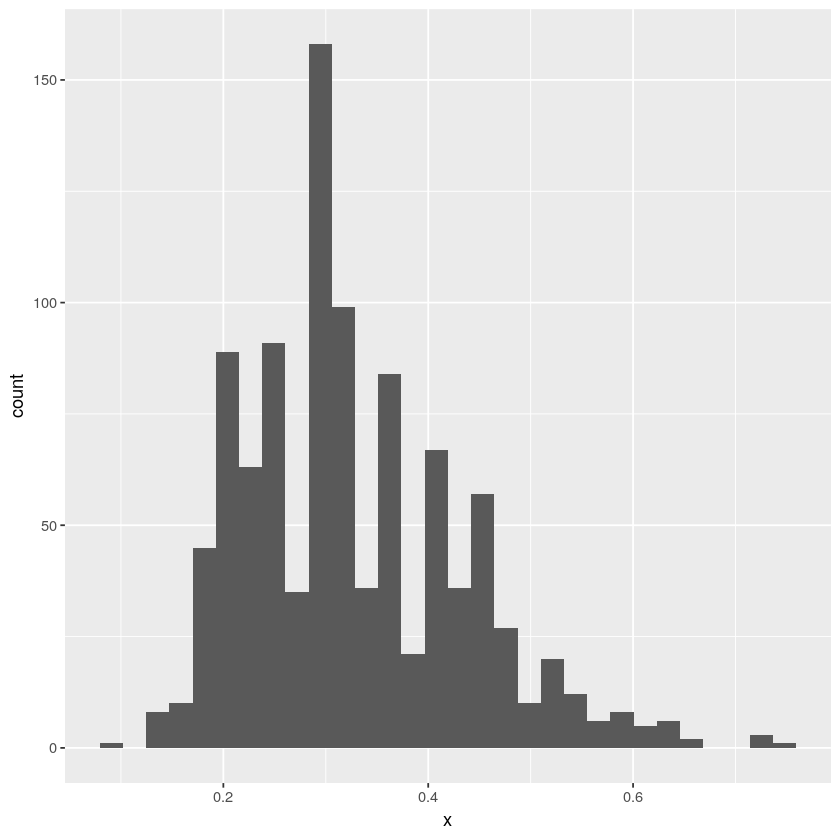

In [93]:
ggplot(data.frame(x=rep), aes(x)) + 
       geom_histogram()

### Problem 3

In [128]:
LSAT = weight.soybean
GPA = c(weight.linseed, 287, 291)
n = length(LSAT)
theta = numeric(n)
theta_hat = cor(LSAT, GPA)

In [129]:
for (i in 1:n){
    theta[i] = cor(LSAT[-i], GPA[-i])
}
theta_mean = mean(theta)

In [130]:
bias = (n-1)*(theta_mean - theta_hat)
bias 

[1] 0.01284452

In [133]:
se = sqrt(n-1/n*sum(theta_hat- theta_mean)^2)
se

[1] 3.741657

### Problem 4

In [162]:
groups = c(rep(1:26, each=2), 26)
ironslag$groups = sample(groups)

In [174]:
error_list = numeric(4)

In [175]:
for (id in 1:26){
    train = ironslag[!ironslag$groups %in% id, ]
    test = ironslag[ironslag$groups %in% id, ]
    
    models = list(lm(magnetic ~ chemical + I(chemical^2), data=train), 
               lm(log(magnetic)~log(chemical)), data=train)
    for (i in length(models)){
        model = lm(magnetic ~ chemical + I(chemical^2), data=train)
        y_hat = predict(model, newdata = test)
        error_list[i] = mean((test$magnetic - y_hat)^2)
    }
}

In [176]:
error_list

[1] 0.000000 0.000000 7.701684 0.000000